In [2]:
# Import Statements
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://www.theverge.com/tldr/2018/2/5/16974194/spotify-recommendation-algorithm-playlist-hack-nelson
# https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/
# https://medium.com/cuepoint/visualizing-hundreds-of-my-favorite-songs-on-spotify-fe50c94b8af3
# https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features

In [3]:
# Assign %pwd to working_dir
working_dir = %pwd

In [4]:
# spotify = pd.read_csv( (working_dir)+"/Data/spotify-pre_processed.csv", delimiter = ",")
spotify = pd.read_csv( (working_dir)+"/Data/data.csv", delimiter = ",")
#spotify

# Datatypes for each attribute.

In [5]:
spotify.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# General characteristics for the numeric attributes (means, standard deviations, and other statistics)

In [6]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


### Acousticness:  
### A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### Does not follow a normal distribution.  Most of the acousticness appears to occur in the .00 and .95 range.

Mean:   0.499
Median: 0.517
Mode:   0.995
Skew:  -0.035


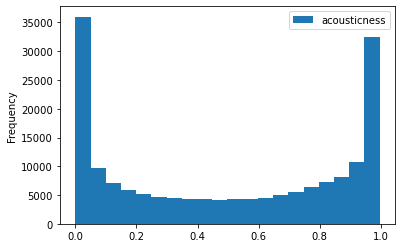

In [7]:
print('Mean:   {:,.3f}'.format(spotify[['acousticness']].mean().values[0]))
print('Median: {}'.format(spotify[['acousticness']].median().values[0]))
print('Mode:  {}'.format(spotify[['acousticness']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['acousticness']].skew().values[0]))
spotify[['acousticness']].plot(kind="hist", bins=20)

### Danceability:  
### Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### It's not quite a normal distribution, it appears to skew to the left.

Mean:   0.537
Median: 0.548
Mode:   0.565
Skew:  -0.236


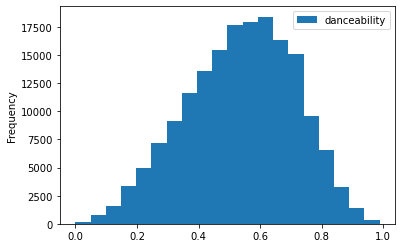

In [8]:
print('Mean:   {:,.3f}'.format(spotify[['danceability']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['danceability']].median().values[0]))
print('Mode:  {}'.format(spotify[['danceability']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['danceability']].skew().values[0]))
spotify[['danceability']].plot(kind="hist", bins=20)

### Energy:  
### Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
### Does not follow a normal distribution.  The distribution skews to the right.

Mean:   0.483
Median: 0.465
Mode:   0.195
Skew:   0.144


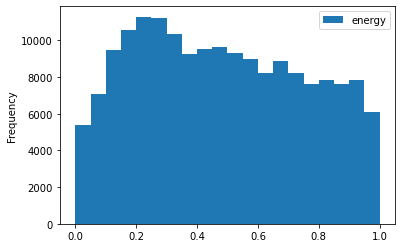

In [9]:
print('Mean:   {:,.3f}'.format(spotify[['energy']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['energy']].median().values[0]))
print('Mode:  {}'.format(spotify[['energy']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['energy']].skew().values[0]))
spotify[['energy']].plot(kind="hist", bins=20)

### Instrumentalness:  
### Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content and is purely instrumental, so for example a classical symphony (with no choral part) would be close to 1.0. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### Does not follow a normal distribution. Appears to skew to the right.  Most of the instrumentalness occurs at the .00 range. 

Mean:   0.197
Median: 0.001
Mode:   0.0
Skew:   1.364


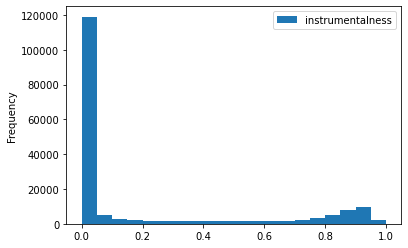

In [10]:
print('Mean:   {:,.3f}'.format(spotify[['instrumentalness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['instrumentalness']].median().values[0]))
print('Mode:  {}'.format(spotify[['instrumentalness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['instrumentalness']].skew().values[0]))
spotify[['instrumentalness']].plot(kind="hist", bins=20)

### Key:  
### The key the track is in.  Integers map to the pitches using standard Pitch Class notation. 
### E.g. 0 = C, 1 = C♯, D♭, 2 = D, 3 = D♯, E♭, 4 = E, 5 = F, 6 = F♯, G♭, 7 = G, 8 = G♯, A♭, 9 = A, 10 = A♯, B♭, 11 = B

### https://en.wikipedia.org/wiki/Pitch_class

### Does not follow a normal distribution.  It appears to be sparsely populated, which makes sense as there is no one dominant key in all of western music.

Mean:   5.205
Median: 5.000
Mode:   0
Skew:   0.004


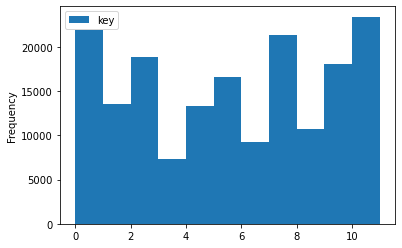

In [11]:
print('Mean:   {:,.3f}'.format(spotify[['key']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['key']].median().values[0]))
print('Mode:  {}'.format(spotify[['key']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['key']].skew().values[0]))
spotify[['key']].plot(kind="hist", bins=11)

### Liveness:  
### Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### Does not follow a not follow a normal distribution.  Appears to skew to the right.  Most of the liveness occurs at the .1 range.

Mean:   0.211
Median: 0.138
Mode:   0.111
Skew:   2.078


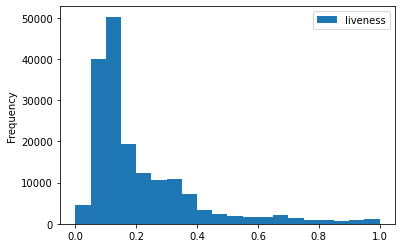

In [12]:
print('Mean:   {:,.3f}'.format(spotify[['liveness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['liveness']].median().values[0]))
print('Mode:  {}'.format(spotify[['liveness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['liveness']].skew().values[0]))
spotify[['liveness']].plot(kind="hist", bins=20)

### Loudness:  
### The overall loudness of a track in decibels (db).  Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.  Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).  Values typical range between -60 and 0 db.

### Does not follow a normal distribution.  Appears to skew to the left.  Most of the loudness occurs at -10db.

Mean:   -11.751
Median: -10.836
Mode:    -7.578
Skew:    -0.989


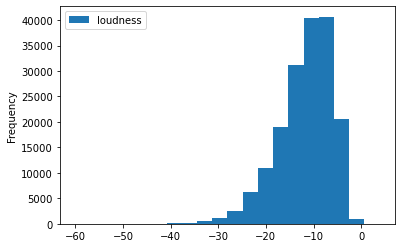

In [13]:
print('Mean:   {:,.3f}'.format(spotify[['loudness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['loudness']].median().values[0]))
print('Mode:    {}'.format(spotify[['loudness']].mode().to_string(header=None,index=False)))
print('Skew:    {:,.3f}'.format(spotify[['loudness']].skew().values[0]))
spotify[['loudness']].plot(kind="hist", bins=20)

### Popularity:  
### The higher the value the more popular the song is.

### Does not follow a normal distribution.  Appears to skew to the right.  Can't explain or interpret what going on around the 0 range. Could be due to there being a high number of songs that are not listened to on Spotify.

Mean:   25.693
Median: 25.000
Mode:    0
Skew:    0.363


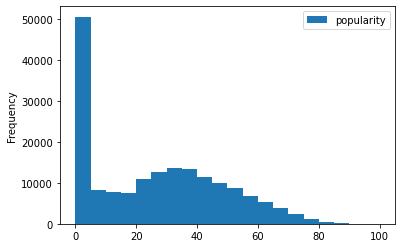

In [15]:
print('Mean:   {:,.3f}'.format(spotify[['popularity']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['popularity']].median().values[0]))
print('Mode:   {}'.format(spotify[['popularity']].mode().to_string(header=None,index=False)))
print('Skew:    {:,.3f}'.format(spotify[['popularity']].skew().values[0]))
spotify[['popularity']].plot(kind="hist", bins=20)

### Top 10 Songs by Popularity

In [16]:
spotify[['artists', 'name', 'popularity']].nlargest(10, 'popularity')
# spotify['artists'].value_counts().head(10)

,artists,name,popularity
20062,['Olivia Rodrigo'],drivers license,100
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,['Ariana Grande'],positions,96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94


### Speechiness:  
### Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words, such as audio-books. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Does not follow a normal distribution.  Appears to skew to the right.  Most of the speechiness occurs at the 0.0 range.

Mean:   0.106
Median: 0.045
Mode:   0.0337
Skew:   3.751


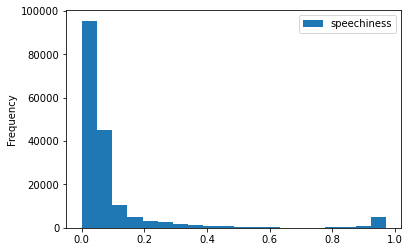

In [17]:
print('Mean:   {:,.3f}'.format(spotify[['speechiness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['speechiness']].median().values[0]))
print('Mode:  {}'.format(spotify[['speechiness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['speechiness']].skew().values[0]))
spotify[['speechiness']].plot(kind="hist", bins=20)

### Tempo:  
### The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### *** Although the distribution almost looks normal.  Skews to the right, but not by much.  Can't explain why the mode is 0.  Requires further investigation. 

Mean:   117.006
Median: 115.816
Mode:     0.0
Skew:     0.423


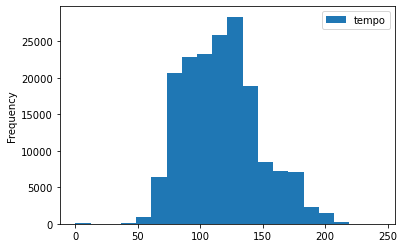

In [19]:
print('Mean:   {:,.3f}'.format(spotify[['tempo']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['tempo']].median().values[0]))
print('Mode:    {}'.format(spotify[['tempo']].mode().to_string(header=None,index=False)))
print('Skew:     {:,.3f}'.format(spotify[['tempo']].skew().values[0]))
spotify[['tempo']].plot(kind="hist", bins=20)

### Valence: 
### A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Does not follow a normal distribution.  It appears to skew to the left.

Mean:   0.525
Median: 0.536
Mode:   0.961
Skew:  -0.101


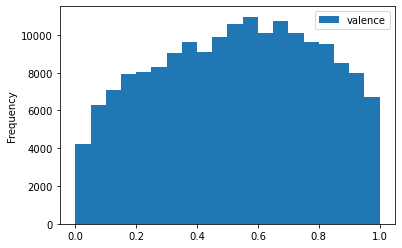

In [20]:
print('Mean:   {:,.3f}'.format(spotify[['valence']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['valence']].median().values[0]))
print('Mode:  {}'.format(spotify[['valence']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['valence']].skew().values[0]))
spotify[['valence']].plot(kind="hist", bins=20)

### Explicitness:
### Indicates if explicit language was used in the song.

### 93% of the songs were not explicit and 7% of the songs were explicit.

Not Explicit:   0.932
Explicit:       0.068


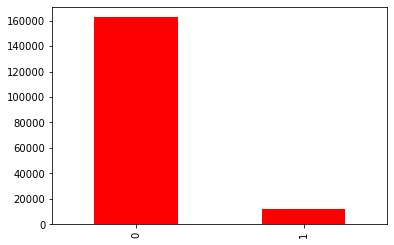

In [21]:
print('Not Explicit:   {:,.3f}'.format(spotify['explicit'].value_counts()[0]/spotify.shape[0]))
print('Explicit:       {:,.3f}'.format(spotify['explicit'].value_counts()[1]/spotify.shape[0]))
spotify['explicit'].value_counts().plot(kind='bar', color='red')

### Mode:
### Mode indicates the modality (major or minor) of a track, the type of scale from which melodic or harmonic content  is derived.  Major is represented by 1 and minor is 0.

### 70% of the melodic content has a major modality and 30% has a minor modality.

Major:   0.702
Minor:   0.298


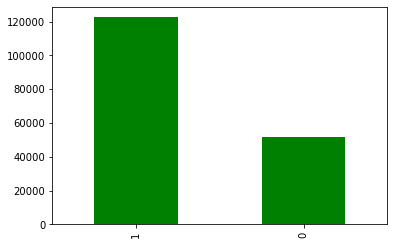

In [23]:
print('Major:   {:,.3f}'.format(spotify['mode'].value_counts()[1]/spotify.shape[0]))
print('Minor:   {:,.3f}'.format(spotify['mode'].value_counts()[0]/spotify.shape[0]))
spotify['mode'].value_counts().plot(kind='bar', color='green')

# Correlation Matrix

### After viewing the correlation matrix, there weren't any high correlation candidates for feature reduction.
### Acoustiness and energy appears to be the most significantly correlated, but still not enough for consideration.

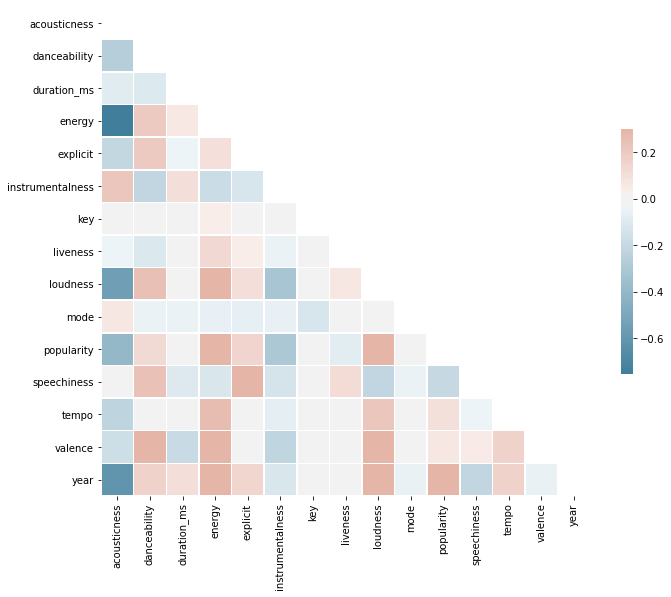

In [24]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
spotify_corr = spotify.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(spotify_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spotify_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Top Negative Correlations

In [25]:
spotify_corr.unstack().sort_values(kind="quicksort").head(14)[4:]

acousticness      loudness           -0.546639
loudness          acousticness       -0.546639
popularity        acousticness       -0.396744
acousticness      popularity         -0.396744
instrumentalness  loudness           -0.317562
loudness          instrumentalness   -0.317562
popularity        instrumentalness   -0.300625
instrumentalness  popularity         -0.300625
danceability      acousticness       -0.263217
acousticness      danceability       -0.263217
dtype: float64

### Top Positive Correlations

In [26]:
spotify_corr.unstack().sort_values(kind="quicksort", ascending=False).head(26)[16:]

energy        loudness        0.779267
              year            0.540850
year          energy          0.540850
valence       danceability    0.536713
danceability  valence         0.536713
popularity    year            0.513227
year          popularity      0.513227
loudness      year            0.465189
year          loudness        0.465189
speechiness   explicit        0.353872
dtype: float64